# BOW ile Metin Sınıflandırma

                                               YORUM  SINIF
0  Bu fiyat bandında alınabilecek en iyi fiyat pe...      1
1  Ürün harika paketlenmişti  Kargo evime söylend...      1
2  Gerçekten bu zamanda alınabilecek fiyat perfor...      1
3  Ürünü indirimden aldım fakat ışık hüzmesi ve 2...      0
4  Ürün elime yanlış geldi  ürünü değiştireceğiz ...      0
  (0, 1541)	1
  (0, 324)	1
  (0, 936)	1
  (0, 313)	1
  (1, 1873)	1
  (1, 674)	1
  (1, 623)	1
  (1, 570)	1
  (1, 1904)	1
  (1, 1518)	1
  (1, 1237)	1
  (1, 932)	1
  (1, 701)	1
  (1, 864)	1
  (1, 610)	1
  (1, 1401)	1
  (1, 887)	1
  (1, 793)	1
  (2, 1873)	1
  (2, 219)	1
  (2, 780)	1
  (2, 574)	1
  (2, 1535)	1
  (2, 961)	1
  (2, 1636)	1
  :	:
  (124, 767)	1
  (124, 1551)	1
  (124, 596)	1
  (125, 324)	1
  (125, 363)	1
  (125, 1557)	1
  (125, 551)	1
  (125, 1193)	1
  (125, 234)	1
  (125, 857)	1
  (125, 400)	1
  (125, 335)	1
  (125, 1351)	1
  (125, 843)	1
  (125, 1153)	1
  (125, 417)	1
  (125, 1083)	1
  (125, 244)	1
  (125, 1923)	1
  (126, 

C:\Users\Kaya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


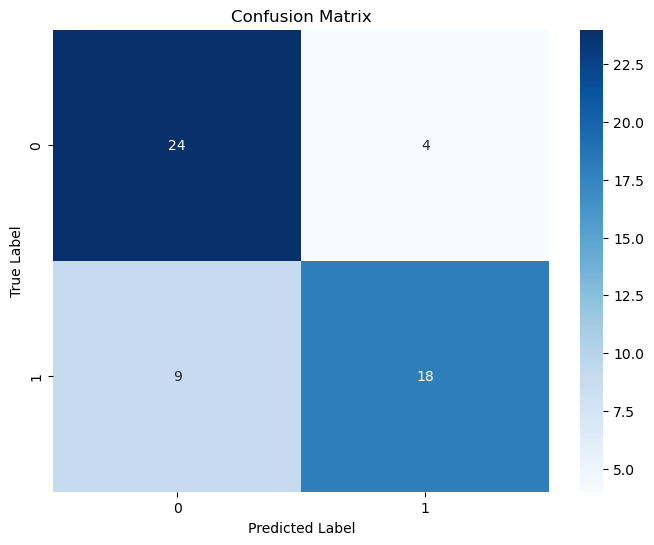

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Veri dosyasının adı
filename = "duyguanalizi.csv"

# Veriyi oku
data = pd.read_csv(filename,encoding='ISO-8859-9')
print(data.head())

# Kategorik sütunu kategorik olarak işaretle
data['SINIF'] = pd.Categorical(data['SINIF'])

# Veriyi eğitim ve test kümelerine böl
dataTrain, dataTest = train_test_split(data, test_size=0.3, stratify=data['SINIF'])

# Eğitim ve test veri kümesindeki metin verilerini al
textDataTrain = dataTrain['YORUM']
textDataTest = dataTest['YORUM']
YTrain = dataTrain['SINIF']
YTest = dataTest['SINIF']

# Metin verilerini ön işleme
def preprocessText(textData):
    documents = textData.str.split()
    # İsterseniz diğer ön işleme adımlarını ekleyebilirsiniz
    return documents

# Eğitim verilerini ön işleme
documentsTrain = preprocessText(textDataTrain)

# BoW modeli oluştur
vectorizer = CountVectorizer()
XTrain = vectorizer.fit_transform([" ".join(doc) for doc in documentsTrain])
print(XTrain)

# Modeli eğit
clf = LinearSVC()
clf.fit(XTrain, YTrain)

# Test verilerini ön işleme ve tahmin
documentsTest = preprocessText(textDataTest)
XTest = vectorizer.transform([" ".join(doc) for doc in documentsTest])

print(XTest.shape)

YPred = clf.predict(XTest)

# Doğruluk hesapla
acc = metrics.accuracy_score(YTest, YPred)
print("Başarı:", acc)

# Karışıklık matrisini oluştur
conf_matrix = metrics.confusion_matrix(YTest, YPred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




                                         Description            Category  \
0  Items are occasionally getting stuck in the sc...  Mechanical Failure   
1  Loud rattling and banging sounds are coming fr...  Mechanical Failure   
2  There are cuts to the power when starting the ...  Electronic Failure   
3                 Fried capacitors in the assembler.  Electronic Failure   
4                           Mixer tripped the fuses.  Electronic Failure   

  Urgency          Resolution   Cost  
0  Medium    Readjust Machine     45  
1  Medium    Readjust Machine     35  
2    High    Full Replacement  16200  
3    High  Replace Components    352  
4     Low   Add to Watch List     55  
Başarı: 0.90625


C:\Users\Kaya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


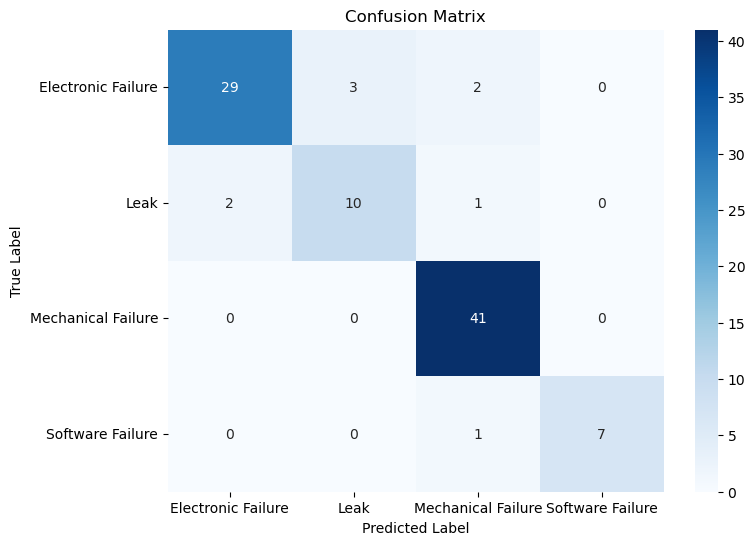

Predictions for new data: ['Leak' 'Electronic Failure' 'Mechanical Failure']


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Veri dosyasının adı
filename = "factoryReports.csv"

# Veriyi oku
data = pd.read_csv(filename)
print(data.head())

# Kategorik sütunu kategorik olarak işaretle
data['Category'] = pd.Categorical(data['Category'])

# Veriyi eğitim ve test kümelerine böl
dataTrain, dataTest = train_test_split(data, test_size=0.2, stratify=data['Category'])

# Eğitim ve test veri kümesindeki metin verilerini al
textDataTrain = dataTrain['Description']
textDataTest = dataTest['Description']
YTrain = dataTrain['Category']
YTest = dataTest['Category']

# Metin verilerini ön işleme
def preprocessText(textData):
    documents = textData.str.split()
    # İsterseniz diğer ön işleme adımlarını ekleyebilirsiniz
    return documents

# Eğitim verilerini ön işleme
documentsTrain = preprocessText(textDataTrain)

# BoW modeli oluştur
vectorizer = CountVectorizer()
XTrain = vectorizer.fit_transform([" ".join(doc) for doc in documentsTrain])

# Modeli eğit
clf = LinearSVC()
clf.fit(XTrain, YTrain)

# Test verilerini ön işleme ve tahmin
documentsTest = preprocessText(textDataTest)
XTest = vectorizer.transform([" ".join(doc) for doc in documentsTest])
YPred = clf.predict(XTest)

# Doğruluk hesapla
acc = metrics.accuracy_score(YTest, YPred)
print("Başarı:", acc)

# Karışıklık matrisini oluştur
conf_matrix = metrics.confusion_matrix(YTest, YPred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Yeni verileri tahmin et
new_data = [
    "Coolant is pooling underneath sorter.",
    "Sorter blows fuses at start up.",
    "There are some very loud rattling sounds coming from the assembler."
]

# Yeni verileri ön işleme ve tahmin
documentsNew = preprocessText(pd.Series(new_data))
XNew = vectorizer.transform([" ".join(doc) for doc in documentsNew])
labelsNew = clf.predict(XNew)

print("Predictions for new data:", labelsNew)


# TF-IDF öznitelikler ile MEtin Sınıflandırma

C:\Users\Kaya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.9479166666666666


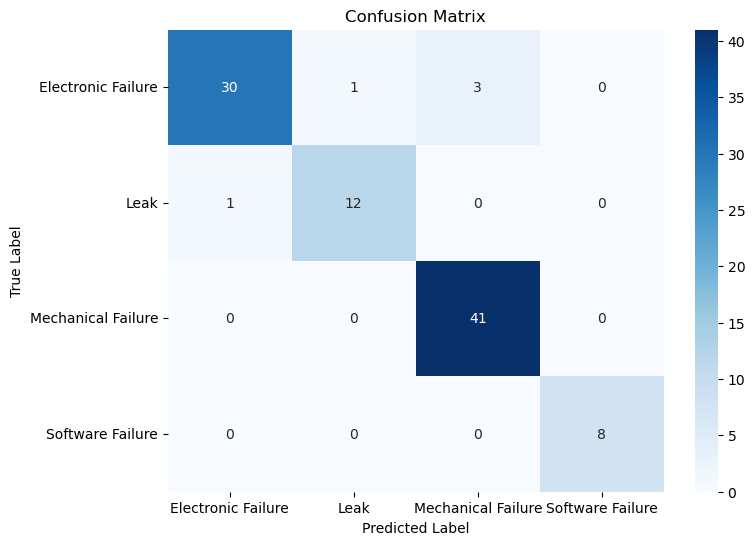

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Veri dosyasının adı
filename = "factoryReports.csv"

# Veriyi oku
data = pd.read_csv(filename)


# Kategorik sütunu kategorik olarak işaretle
data['Category'] = pd.Categorical(data['Category'])

# Veriyi eğitim ve test kümelerine böl
dataTrain, dataTest = train_test_split(data, test_size=0.2, stratify=data['Category'])

# Eğitim ve test veri kümesindeki metin verilerini al
textDataTrain = dataTrain['Description']
textDataTest = dataTest['Description']
YTrain = dataTrain['Category']
YTest = dataTest['Category']

# TF-IDF vektörlerini oluştur
vectorizer = TfidfVectorizer()
XTrain = vectorizer.fit_transform(textDataTrain)
XTest = vectorizer.transform(textDataTest)

# Modeli eğit
clf = LinearSVC()
clf.fit(XTrain, YTrain)

# Test verilerini tahmin et
YPred = clf.predict(XTest)

# Doğruluk hesapla
acc = metrics.accuracy_score(YTest, YPred)
print("Accuracy:", acc)

# Karışıklık matrisini oluştur
conf_matrix = metrics.confusion_matrix(YTest, YPred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




# Eş Oluşum Matrisleri ile Sınıflandırma

                                         Description            Category  \
0  Items are occasionally getting stuck in the sc...  Mechanical Failure   
1  Loud rattling and banging sounds are coming fr...  Mechanical Failure   
2  There are cuts to the power when starting the ...  Electronic Failure   
3                 Fried capacitors in the assembler.  Electronic Failure   
4                           Mixer tripped the fuses.  Electronic Failure   

  Urgency          Resolution   Cost  
0  Medium    Readjust Machine     45  
1  Medium    Readjust Machine     35  
2    High    Full Replacement  16200  
3    High  Replace Components    352  
4     Low   Add to Watch List     55  
  (63, 4)	1
  (234, 0)	1
  (238, 5)	1
  (274, 3)	1
  (288, 2)	1
  (320, 1)	1
Accuracy: 0.4236111111111111


C:\Users\Kaya\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Kaya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


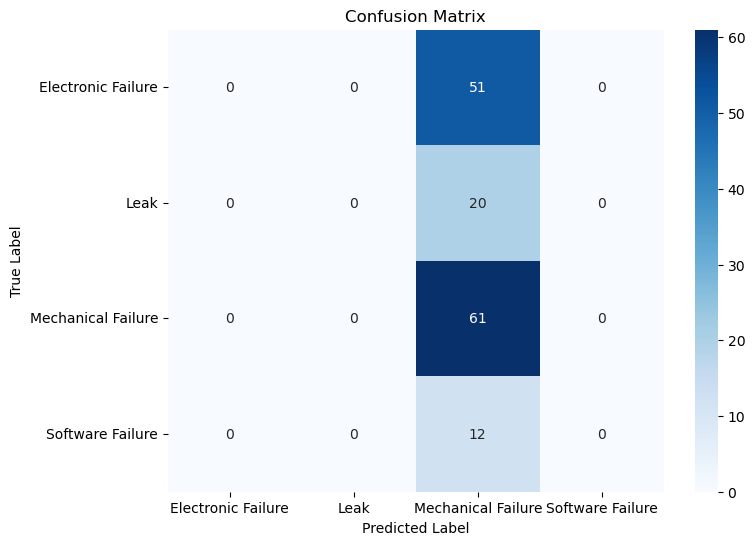

Predictions for new data: ['Mechanical Failure' 'Mechanical Failure' 'Mechanical Failure']


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Veri dosyasının adı
filename = "factoryReports.csv"

# Veriyi oku
data = pd.read_csv(filename)
print(data.head())

# Kategorik sütunu kategorik olarak işaretle
data['Category'] = pd.Categorical(data['Category'])

# Veriyi eğitim ve test kümelerine böl
dataTrain, dataTest = train_test_split(data, test_size=0.3, stratify=data['Category'])

# Eğitim ve test veri kümesindeki metin verilerini al
textDataTrain = dataTrain['Description']
textDataTest = dataTest['Description']
YTrain = dataTrain['Category']
YTest = dataTest['Category']

# Eş oluşum matrisini oluştur (N-gram=2)
vectorizer = CountVectorizer(ngram_range=(2, 2), binary=True, tokenizer=lambda x: x.split(', '))
XTrain = vectorizer.fit_transform(textDataTrain)
XTest = vectorizer.transform(textDataTest)

print(XTrain)
# Modeli eğit
clf = LinearSVC()
clf.fit(XTrain, YTrain)

# Test verilerini tahmin et
YPred = clf.predict(XTest)

# Doğruluk hesapla
acc = metrics.accuracy_score(YTest, YPred)
print("Accuracy:", acc)

# Karışıklık matrisini oluştur
conf_matrix = metrics.confusion_matrix(YTest, YPred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Yeni verileri tahmin et
new_data = [
    "Coolant is pooling underneath sorter.",
    "Sorter blows fuses at start up.",
    "There are some very loud rattling sounds coming from the assembler."
]

# Yeni verileri eş oluşum matrisine çevir ve tahmin et
XNew = vectorizer.transform(new_data)
labelsNew = clf.predict(XNew)

print("Predictions for new data:", labelsNew)


# One Hot Encoding ile sınıflandırma

                                         Description            Category  \
0  Items are occasionally getting stuck in the sc...  Mechanical Failure   
1  Loud rattling and banging sounds are coming fr...  Mechanical Failure   
2  There are cuts to the power when starting the ...  Electronic Failure   
3                 Fried capacitors in the assembler.  Electronic Failure   
4                           Mixer tripped the fuses.  Electronic Failure   

  Urgency          Resolution   Cost  
0  Medium    Readjust Machine     45  
1  Medium    Readjust Machine     35  
2    High    Full Replacement  16200  
3    High  Replace Components    352  
4     Low   Add to Watch List     55  
Accuracy: 0.4722222222222222


C:\Users\Kaya\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Kaya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


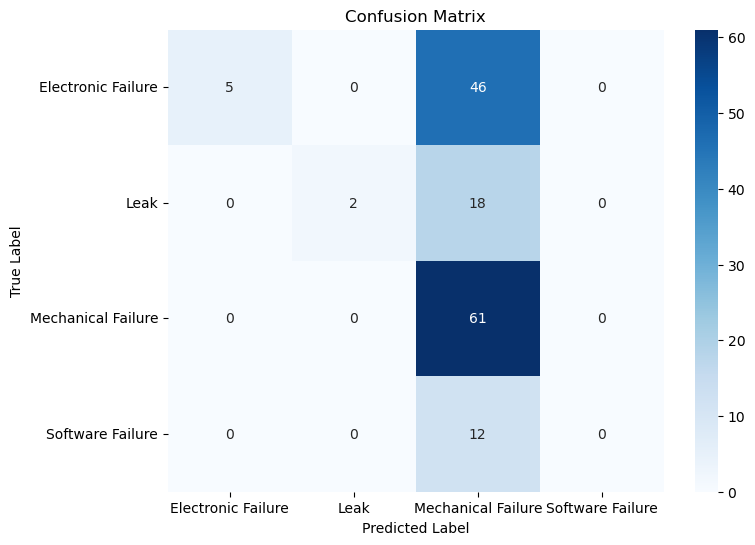

Predictions for new data: ['Mechanical Failure' 'Mechanical Failure' 'Mechanical Failure']


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Veri dosyasının adı
filename = "factoryReports.csv"

# Veriyi oku
data = pd.read_csv(filename)
print(data.head())

# Kategorik sütunu kategorik olarak işaretle
data['Category'] = pd.Categorical(data['Category'])

# Veriyi eğitim ve test kümelerine böl
dataTrain, dataTest = train_test_split(data, test_size=0.3, stratify=data['Category'])

# Eğitim ve test veri kümesindeki metin verilerini al
textDataTrain = dataTrain['Description']
textDataTest = dataTest['Description']
YTrain = dataTrain['Category']
YTest = dataTest['Category']

# One-hot encoding matrisini oluştur
vectorizer = CountVectorizer(binary=True, tokenizer=lambda x: x.split(', '))
XTrain = vectorizer.fit_transform(textDataTrain)
XTest = vectorizer.transform(textDataTest)

# Modeli eğit
clf = LinearSVC()
clf.fit(XTrain, YTrain)

# Test verilerini tahmin et
YPred = clf.predict(XTest)

# Doğruluk hesapla
acc = metrics.accuracy_score(YTest, YPred)
print("Accuracy:", acc)

# Karışıklık matrisini oluştur
conf_matrix = metrics.confusion_matrix(YTest, YPred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Yeni verileri tahmin et
new_data = [
    "Coolant is pooling underneath sorter.",
    "Sorter blows fuses at start up.",
    "There are some very loud rattling sounds coming from the assembler."
]

# Yeni verileri one-hot encoding matrisine çevir ve tahmin et
XNew = vectorizer.transform(new_data)
labelsNew = clf.predict(XNew)

print("Predictions for new data:", labelsNew)
